In [804]:
# Imported libraries
import pandas as pd        # Data manipulation and analysis 
import numpy as np         # Numberical data analysis

import seaborn as sns      # Data visualization
import matplotlib.pyplot as plt   # Data visualization

# Train-test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score

# Full column-width display
pd.set_option('display.max_colwidth', None)

# Classification report
from sklearn.metrics import classification_report

# Useful algorithm
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

#### **1. Data Loading**

In [805]:
# Load the data files...
train_dt_path = "./Train.csv"
test_dt_path = "./Test.csv"

# Read dataset
def read_dataset(path):
    try:
        return pd.read_csv(path)
    except FileNotFoundError:
        print(f"File not found: {path}")
        return None

train_dataset = read_dataset(train_dt_path)
test_dataset = read_dataset(test_dt_path)

# Check if the datasets are loaded.
if train_dataset is not None:
    print("Train dataset loaded successfully.")
else:
    print("Failed to load train dataset.")

# Check if the datasets are loaded.
if test_dataset is not None:
    print("Test dataset loaded successfully.")
else:
    print("Failed to load test dataset.")

Train dataset loaded successfully.
Test dataset loaded successfully.


##### **1.1 - View dataset**

In [806]:
train_dataset.head(5)       # View dataset head

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
0,ID_4W8AP96UO6,114.798900,3790.450939,28.0,0.427078,6.162365,21.220403,58.492773,63.959387,0.621206,0.521813,24.624612,0.0,1001.533430,27.190843,1
1,ID_UD3TM0ZYND,14.154240,5182.451722,28.0,0.138876,5.399498,0.000000,22.886762,29.508369,0.422183,0.444403,0.044440,0.0,1089.121009,30.150941,0
2,ID_XAG1HC0HWM,0.044444,120.821253,28.0,0.000000,1.577765,0.000000,11.733239,12.888786,0.177776,0.155554,0.044444,0.0,322.464081,28.163287,0
3,ID_CEXD05IR09,31.369916,127228.251100,31.0,0.523750,15.981107,5.356671,602.125436,6976.986795,3.311801,5.756755,5.623394,0.0,12015.169690,34.204404,0
4,ID_X6E97FT8IF,5.046181,1091.620117,25.0,0.069468,1.356022,0.000000,16.138887,13.271234,0.155609,0.133379,0.000000,0.0,550.989619,31.466889,1


In [807]:
test_dataset.head(5)        # View dataset head

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius
0,ID_L7RNFK5JC9,32.709430,121124.141400,30.407359,0.496719,3.999064,0.000000,335.565884,737.338490,1.844013,1.910664,0.311038,0.0,726.318848,20.008686
1,ID_KUTY5K1G5F,2.065990,2029.713475,29.000000,0.000000,3.665467,0.000000,63.845771,41.119875,0.733093,0.577589,0.044430,0.0,385.473839,33.015399
2,ID_H6PJWKU831,114.524684,3888.550764,28.000000,0.486075,0.777719,0.199985,11.354698,11.332477,0.177764,0.133323,0.000000,0.0,504.828540,30.091141
3,ID_DNQXNVTXHE,27.036810,5581.324782,25.000000,0.314968,1.789015,0.000000,44.297028,13.430214,0.302369,0.125987,0.000000,0.0,465.950312,22.211252
4,ID_8CRTF1BJOD,1.177267,176.634467,28.000000,0.000000,1.710369,0.000000,88.161746,57.508380,0.888503,0.777440,0.000000,0.0,771.665166,31.032570


In [808]:
# Check the dataset columns
train_dataset.columns

Index(['ID', 'I/O Data Operations', ' I/O Data Bytes',
       'Number of subprocesses', 'Time on processor', 'Disk Reading/sec',
       'Disc Writing/sec', 'Bytes Sent/sent', 'Received Bytes (HTTP)',
       'Network packets sent', 'Network packets received', 'Pages Read/sec',
       'Pages Input/sec', 'Page Errors/sec', 'Confirmed byte radius', 'Label'],
      dtype='object')

In [809]:
# Check the dataset columns
test_dataset.columns

Index(['ID', 'I/O Data Operations', ' I/O Data Bytes',
       'Number of subprocesses', 'Time on processor', 'Disk Reading/sec',
       'Disc Writing/sec', 'Bytes Sent/sent', 'Received Bytes (HTTP)',
       'Network packets sent', 'Network packets received', 'Pages Read/sec',
       'Pages Input/sec', 'Page Errors/sec', 'Confirmed byte radius'],
      dtype='object')

In [810]:
# Number of records in a dataset 
num_records = train_dataset.shape[0]
print(f"Number of records: {num_records}")

Number of records: 8908


#### **1.2: Exploratory Data Analysis**

In [811]:
# Information about the train-dataset (No. of non-null records and datatype)
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8908 entries, 0 to 8907
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        8908 non-null   object 
 1   I/O Data Operations       8908 non-null   float64
 2    I/O Data Bytes           8908 non-null   float64
 3   Number of subprocesses    8908 non-null   float64
 4   Time on processor         8908 non-null   float64
 5   Disk Reading/sec          8908 non-null   float64
 6   Disc Writing/sec          8908 non-null   float64
 7   Bytes Sent/sent           8908 non-null   float64
 8   Received Bytes (HTTP)     8908 non-null   float64
 9   Network packets sent      8908 non-null   float64
 10  Network packets received  8908 non-null   float64
 11  Pages Read/sec            8908 non-null   float64
 12  Pages Input/sec           8908 non-null   float64
 13  Page Errors/sec           8908 non-null   float64
 14  Confirme

In [812]:
# Information about the test-dataset (No. of non-null records and datatype)
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        3818 non-null   object 
 1   I/O Data Operations       3818 non-null   float64
 2    I/O Data Bytes           3818 non-null   float64
 3   Number of subprocesses    3818 non-null   float64
 4   Time on processor         3818 non-null   float64
 5   Disk Reading/sec          3818 non-null   float64
 6   Disc Writing/sec          3818 non-null   float64
 7   Bytes Sent/sent           3818 non-null   float64
 8   Received Bytes (HTTP)     3818 non-null   float64
 9   Network packets sent      3818 non-null   float64
 10  Network packets received  3818 non-null   float64
 11  Pages Read/sec            3818 non-null   float64
 12  Pages Input/sec           3818 non-null   float64
 13  Page Errors/sec           3818 non-null   float64
 14  Confirme

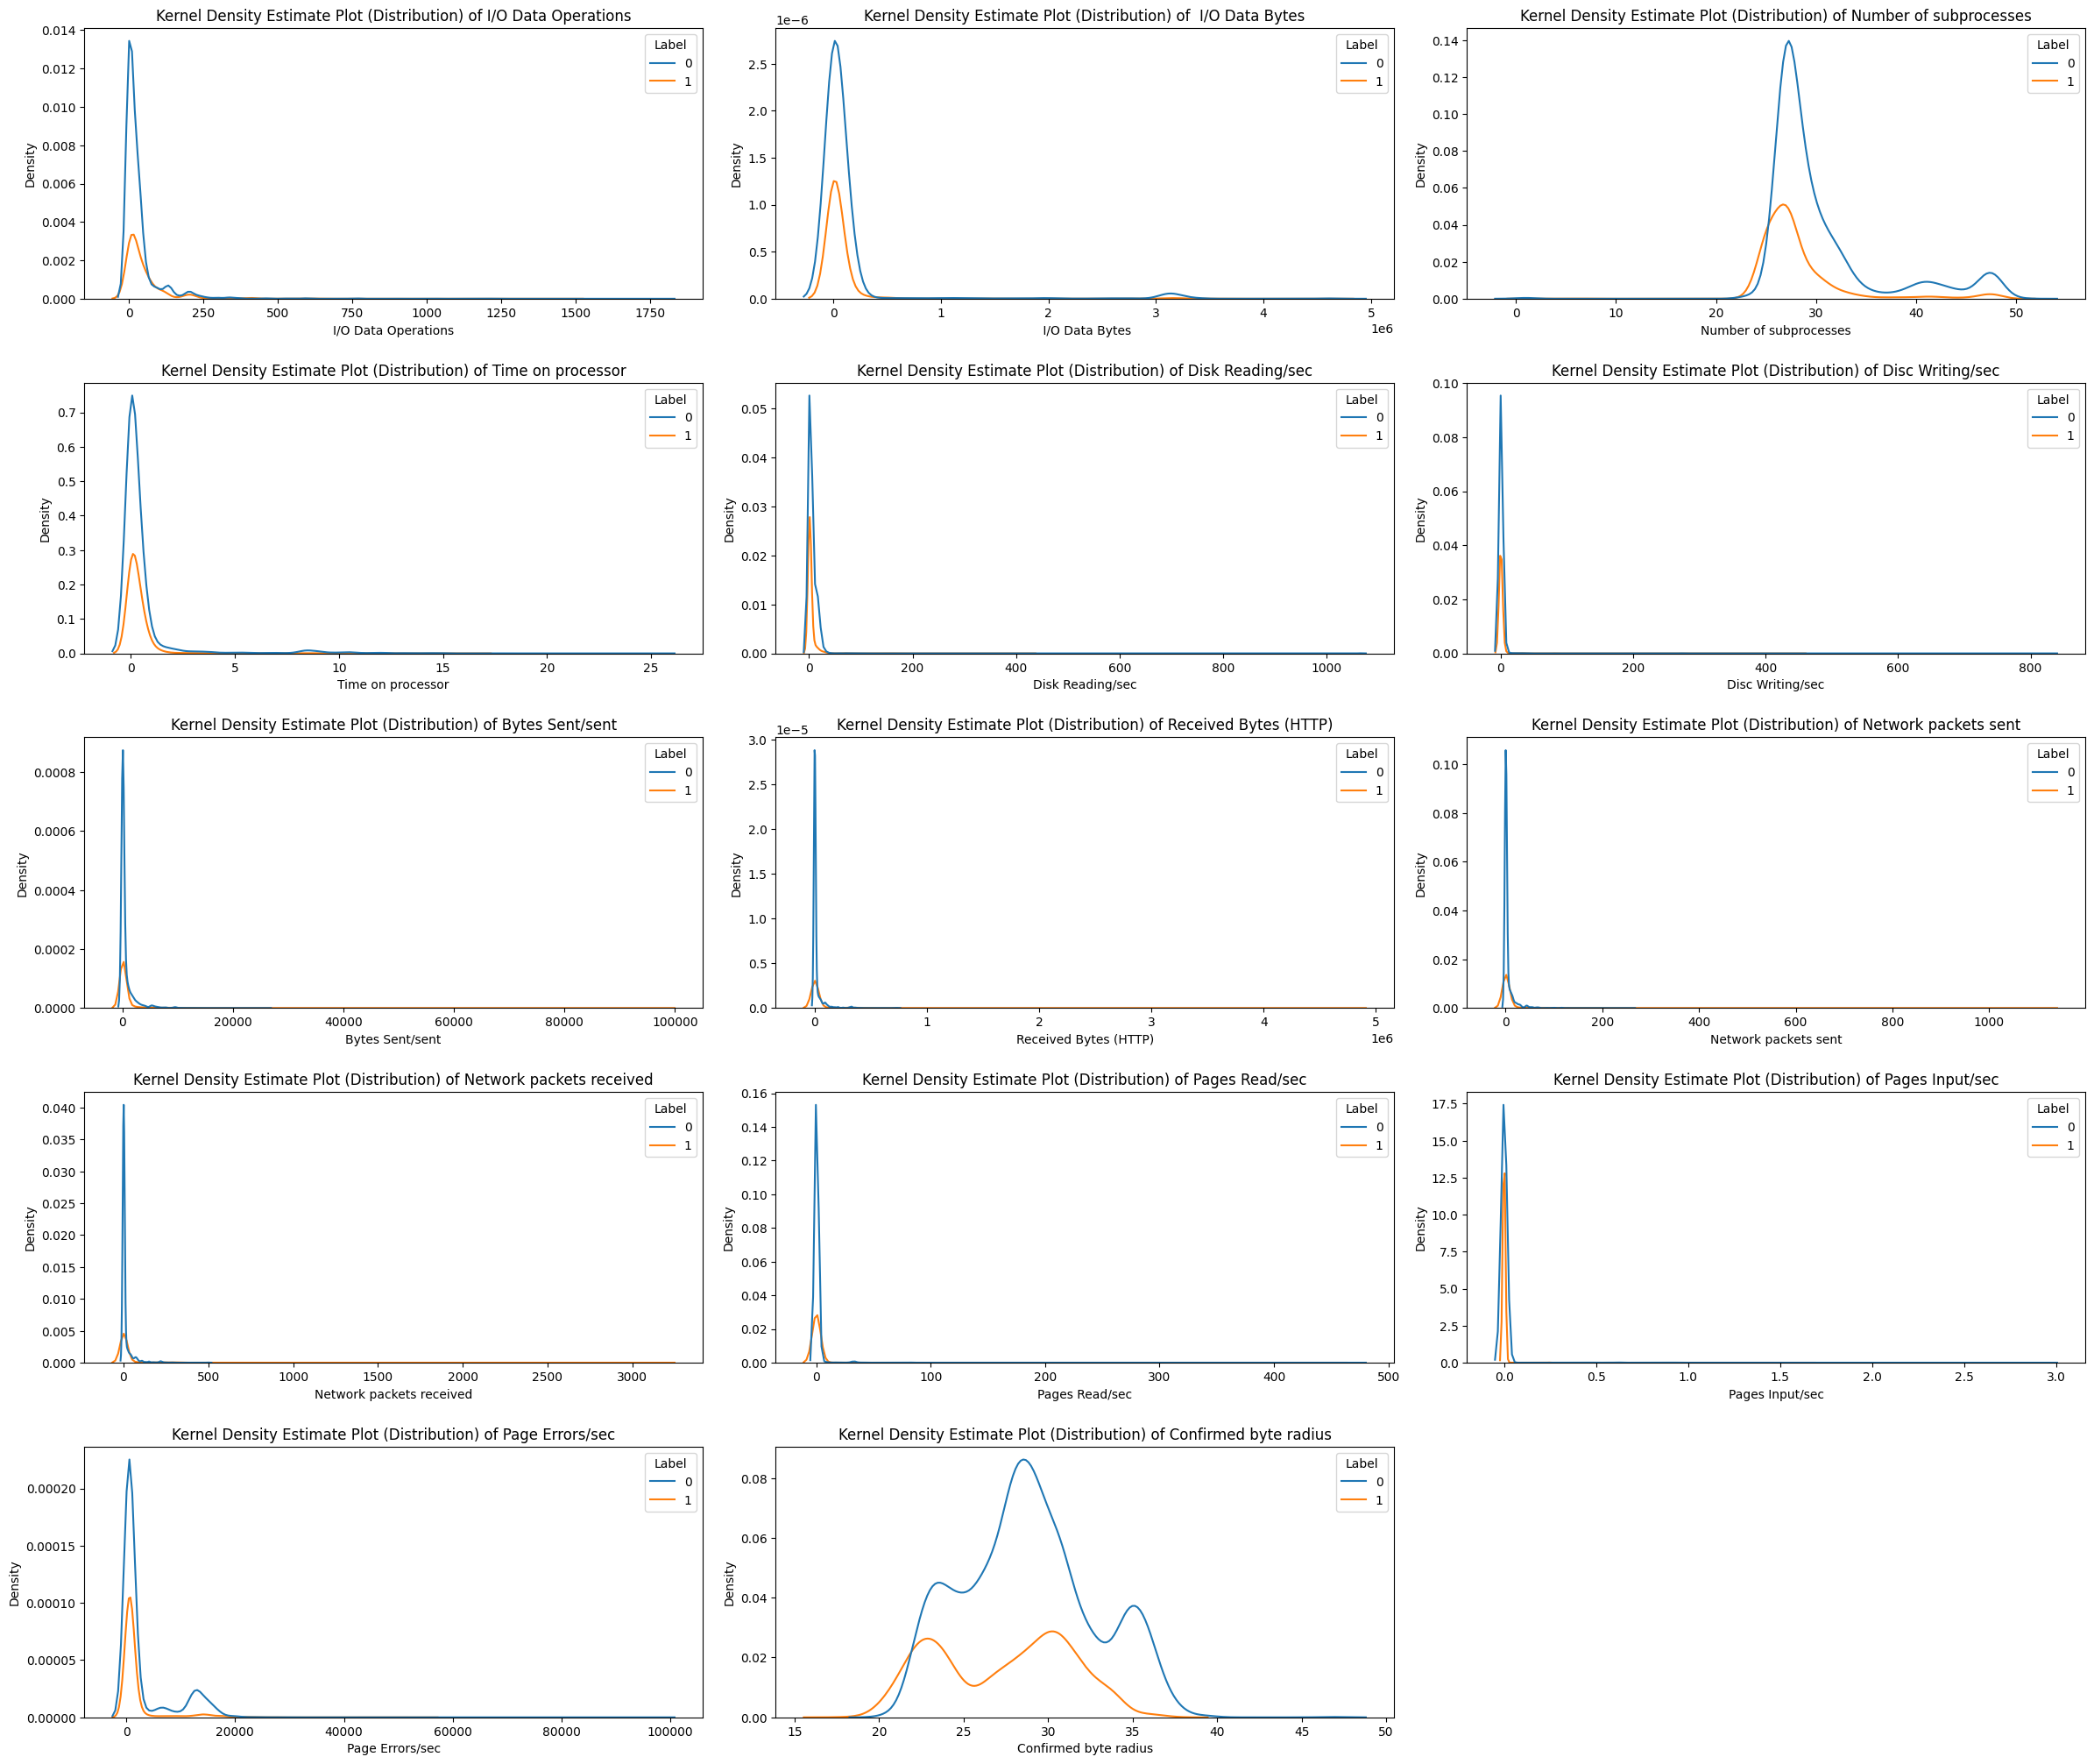

In [813]:
# Visualize the shape of the data distribution of each feature. 
# View where values are concerntrated over the interval.

# Calculate the number of rows and columns needed for subplots.
n_features = len(train_dataset.columns)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

# Create a figure and a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(8 * n_cols, 4 * n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot KDE for each feature
for i, column in enumerate(train_dataset.columns[1:-1]):
    ax = axes[i]
    sns.kdeplot(data=train_dataset, x=column, hue="Label", ax=ax)
    ax.set_title(f'Kernel Density Estimate Plot (Distribution) of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Density')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [814]:
# Find the correlation coefficient of each feature in relation to the targeted variable.
corr_matrix = train_dataset[train_dataset.columns[1:]].corr()

# Extract the correlation 
target_corr = corr_matrix['Label'].drop("Label")

# Rank the features based on their correlation (absolute value) with the target variable
ranked_features = target_corr.abs().sort_values(ascending=False)

# Display the ranked features
print(ranked_features)

Number of subprocesses      0.185420
Confirmed byte radius       0.174451
Page Errors/sec             0.117415
I/O Data Operations         0.099165
Disk Reading/sec            0.053590
Received Bytes (HTTP)       0.052535
 I/O Data Bytes             0.050343
Network packets received    0.045522
Network packets sent        0.041176
Time on processor           0.029156
Pages Input/sec             0.024041
Pages Read/sec              0.020558
Bytes Sent/sent             0.009655
Disc Writing/sec            0.002698
Name: Label, dtype: float64


In [815]:
X = train_dataset.drop(columns=["ID", "Label"])
y = train_dataset["Label"]

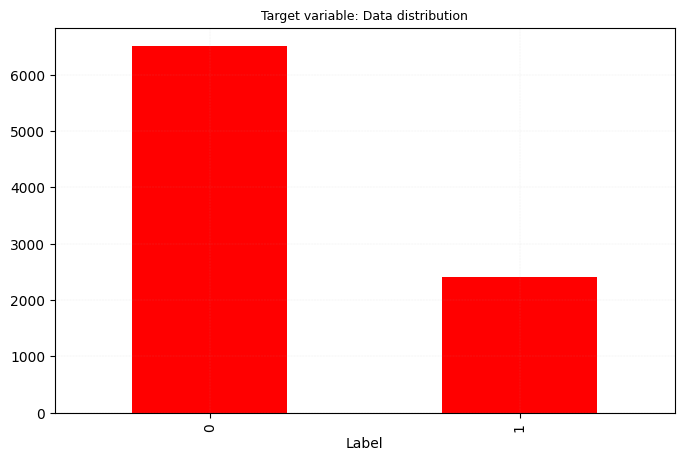

In [816]:
# Let's check the count of proportion of the target variable
plt.figure(figsize=(8, 5))
plt.title("Target variable: Data distribution", fontsize="9")
y.value_counts().plot(kind="bar", color="red")
plt.grid(True, linestyle="-.", alpha=0.4, linewidth=0.2)
plt.show()

In [817]:
# Let's use train-test split...
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [818]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [819]:
smote_xgb_clf = XGBClassifier(
    objective='binary:logistic', 
    eval_metric='logloss',
    max_depth=10, 
    learning_rate=0.1,
    n_estimators=1000,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.006
)

xgb_clf = XGBClassifier(
    objective='binary:logistic', 
    eval_metric='logloss',
    max_depth=10, 
    learning_rate=0.1,
    n_estimators=1000,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.006
)

smote_xgb_clf.fit(X_train_resampled, y_train_resampled, eval_set=[(X_val, y_val)], verbose=250)
xgb_clf.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=250)

[0]	validation_0-logloss:0.62178
[250]	validation_0-logloss:0.05587
[500]	validation_0-logloss:0.05652
[750]	validation_0-logloss:0.05753
[999]	validation_0-logloss:0.05790
[0]	validation_0-logloss:0.51840
[250]	validation_0-logloss:0.05922
[500]	validation_0-logloss:0.05905
[750]	validation_0-logloss:0.06027
[999]	validation_0-logloss:0.06086


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [820]:
prediction = xgb_clf.predict(X_val)
smote_prediction = smote_xgb_clf.predict(X_val)

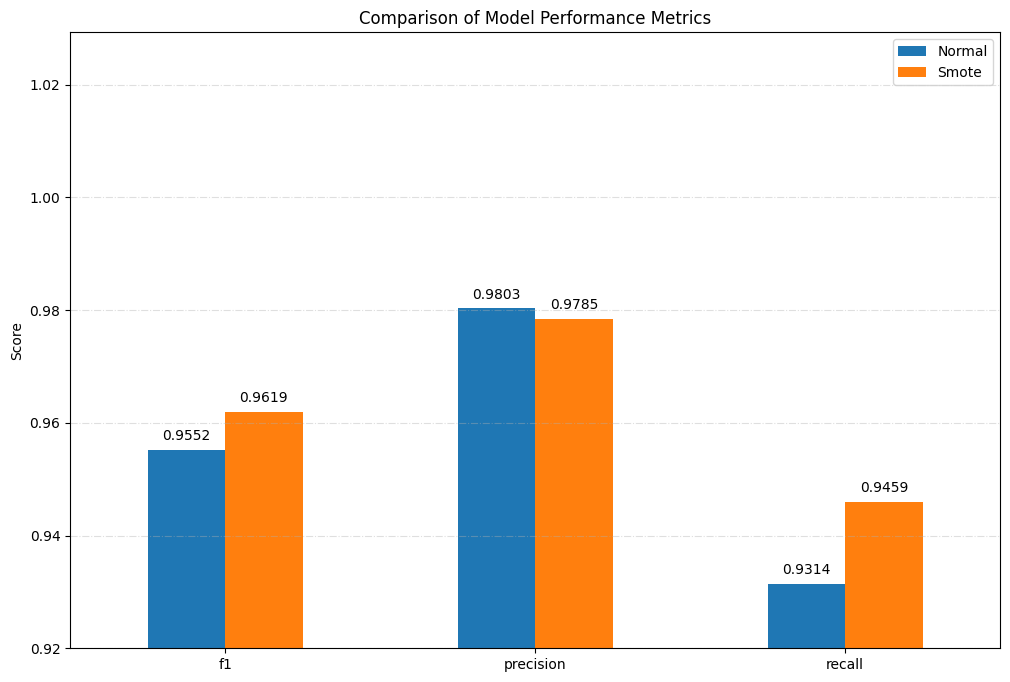

,Normal,Smote
f1,0.955224,0.961945
precision,0.980306,0.978495
recall,0.931393,0.945946


In [831]:
# Calculate F1 score, precision, and recall
f1 = f1_score(y_val, prediction)
precision = precision_score(y_val, prediction)
recall = recall_score(y_val, prediction)

# SMOTE: Calculate F1 score, precision, and recall
smote_f1 = f1_score(y_val, smote_prediction)
smote_precision = precision_score(y_val, smote_prediction)
smote_recall = recall_score(y_val, smote_prediction)

# Print the scores
result_comparision = {
    "Normal": {"f1":f1, "precision":precision, "recall":recall},
    "Smote": {"f1":smote_f1, "precision":smote_precision, "recall":smote_recall},
}

# Convert the dictionary to a pandas dataframe
df = pd.DataFrame(result_comparision)

ax = df.plot(kind='bar', figsize=(12, 8), rot=0)
plt.title('Comparison of Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0.92)  # Adjusted for better visibility of text labels
plt.grid(axis='y', linestyle='-.', alpha=0.4)

# Adding the text on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

df

In [822]:
print(classification_report(y_val, prediction))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1301
           1       0.98      0.93      0.96       481

    accuracy                           0.98      1782
   macro avg       0.98      0.96      0.97      1782
weighted avg       0.98      0.98      0.98      1782



In [823]:
test_dataset["Label"] = smote_xgb_clf.predict(test_dataset.drop(columns="ID"))
dt_printout = test_dataset[["ID", "Label"]]


In [824]:
dt_printout.head(5)

,ID,Label
0,ID_L7RNFK5JC9,0
1,ID_KUTY5K1G5F,0
2,ID_H6PJWKU831,1
3,ID_DNQXNVTXHE,1
4,ID_8CRTF1BJOD,0


In [825]:
dt_printout.to_csv("Cryptojacking_detection_new.csv", index=False)